In [35]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader.data as web
from pandas.plotting import scatter_matrix
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [36]:
start = datetime(2016, 7, 1)
end = datetime(2021, 6, 30)

In [37]:
tesla = web.DataReader("TSLA", 'yahoo', start, end)
ford = web.DataReader("F", 'yahoo', start, end)
gm = web.DataReader("GM", 'yahoo', start, end)

In [38]:
# datelist = pd.date_range(start, periods=1258).tolist()
# date = pd.DatetimeIndex(datelist)
# tesla_array = tesla['Open'].to_numpy()
# gm_array = gm['Open'].to_numpy()
# ford_array = ford['Open'].to_numpy()


# df_prices = pd.DataFrame(tesla_array, date, ['Tesla Opening Price'])
# df_prices['Ford Opening Price'] = ford_array.tolist()
# df_prices['GM Opening Price'] = gm_array.tolist()
# df_prices['Date'] = date.tolist()
# df_prices.set_index('Date', inplace=True)
# df_prices.plot()

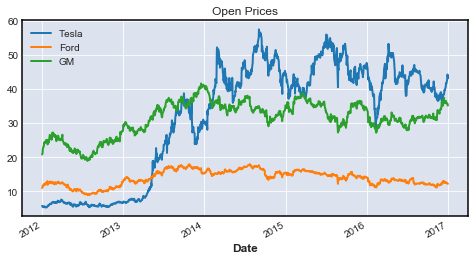

In [71]:
tesla['Open'].plot(label='Tesla', figsize = (8, 4), title = "Open Prices")
ford['Open'].plot(label='Ford')
gm['Open'].plot(label='GM')
plt.legend();

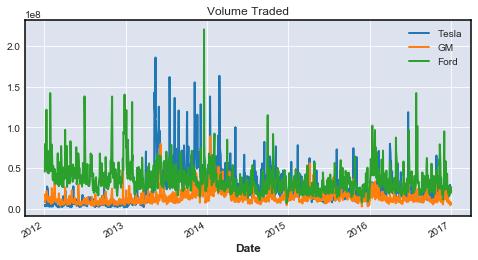

In [72]:
tesla['Volume'].plot(label='Tesla', figsize = (8, 4), title = "Volume Traded")
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend();

In [41]:
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

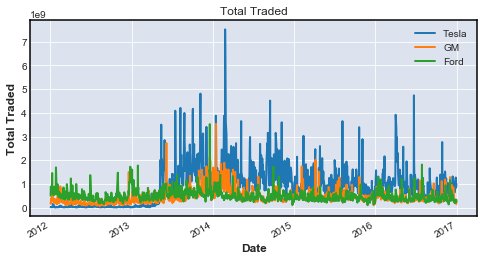

In [73]:
tesla['Total Traded']=tesla['Open']*tesla['Volume']
ford['Total Traded']=ford['Open']*ford['Volume']
gm['Total Traded']=gm['Open']*gm['Volume']

tesla['Total Traded'].plot(label='Tesla', figsize = (8, 4), title = "Total Traded")
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.xlabel('Date')
plt.ylabel('Total Traded')
plt.legend();

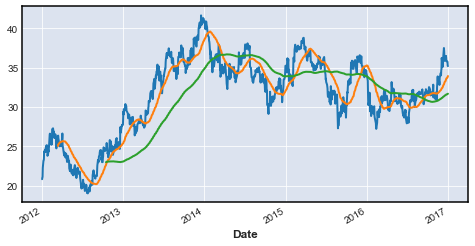

In [74]:
gm['Open'].plot(figsize=(8,4))
gm.rolling(window=50).mean()['Open'].plot()
gm.rolling(window=200).mean()['Open'].plot();

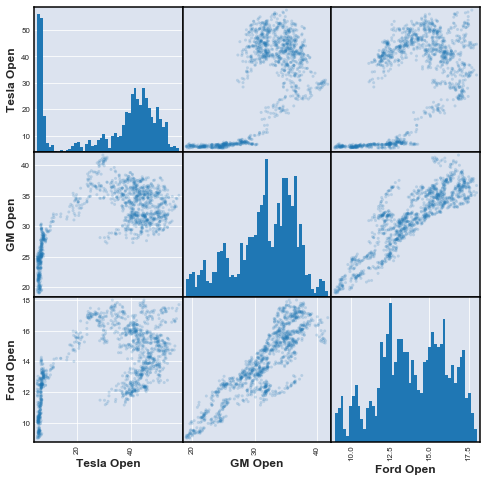

In [44]:
df_prices = pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis=1)
df_prices.columns = ['Tesla Open', 'GM Open', 'Ford Open']
scatter_matrix(df_prices, alpha = 0.2, figsize=(8,8), diagonal = 'hist', hist_kwds={'bins':50});

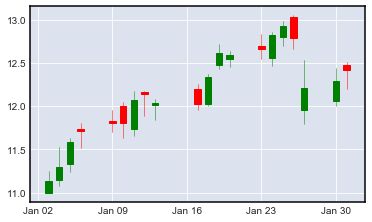

In [46]:
# ford_jan=ford.loc['2012-01-01':'2012-01-31']

# mpf.plot(ford_jan, type='candle')

# Rest the index to get a column of January Dates

ford_reset = ford.loc['2012-01':'2012-01'].reset_index()

ford_reset['converted_Date'] = ford_reset['Date'].apply(lambda date: date2num(date))

ford_values = [tuple(vals) for vals in ford_reset[['converted_Date', 'Open', 'High', 'Low', 'Close']].values]

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(WeekdayLocator(MONDAY))
ax.xaxis.set_minor_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

candlestick_ohlc(ax, ford_values, width=0.6, colorup='g',colordown='r');

In [51]:
# tesla.drop(['Adj Close'], axis=1, inplace=True)
tesla['returns'] = tesla['Close'].pct_change(1)

# ford.drop(['Adj Close'], axis=1, inplace=True)
ford['returns'] = ford['Close'].pct_change(1)

# gm.drop(['Adj Close'], axis=1, inplace=True)
gm['returns'] = gm['Close'].pct_change(1)

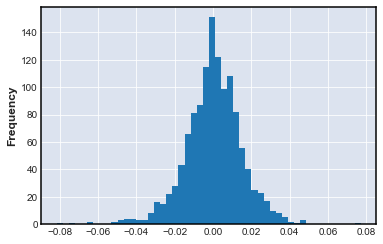

In [58]:
ford['returns'].plot.hist(grid=True, bins=50);

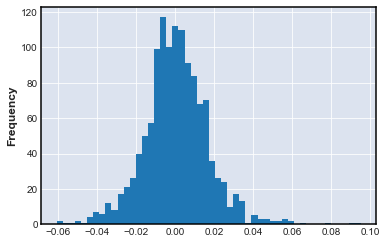

In [57]:
gm['returns'].plot.hist(grid=True, bins=50);

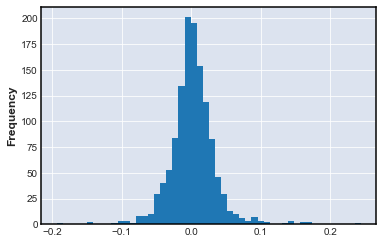

In [56]:
tesla['returns'].plot.hist(grid=True, bins=50);

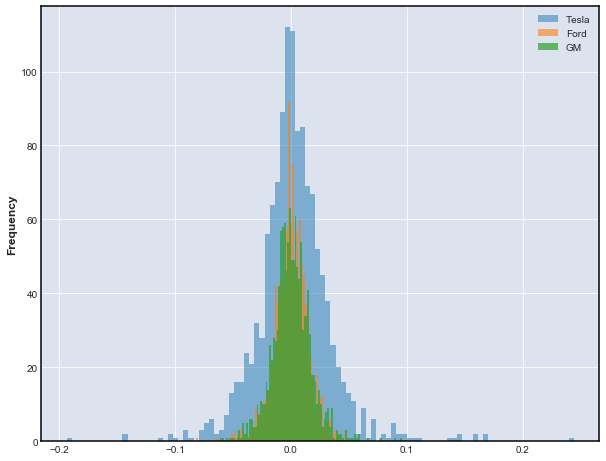

In [60]:
tesla['returns'].plot.hist(grid=True, label = 'Tesla', bins=100, alpha=0.5, figsize=(10,8) )
ford['returns'].plot.hist(grid=True, label = 'Ford', bins=100, alpha=0.6, figsize=(10,8))
gm['returns'].plot.hist(grid=True, label = 'GM', bins=100, alpha=0.7, figsize=(10,8))
plt.legend();

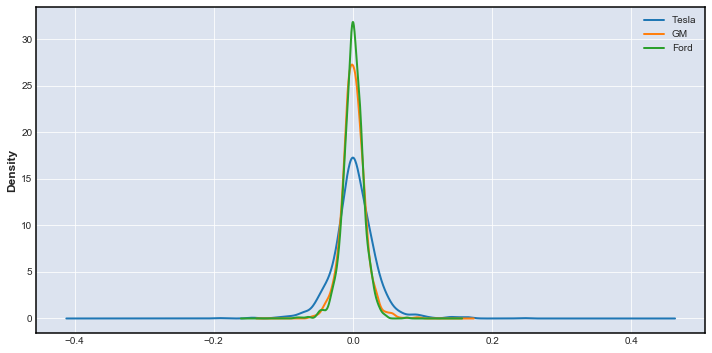

In [61]:
tesla['returns'].plot.kde(label = 'Tesla', figsize=(12,6))
gm['returns'].plot.kde(label = 'GM', figsize=(12,6))
ford['returns'].plot.kde(label = 'Ford', figsize=(12,6))
plt.legend();

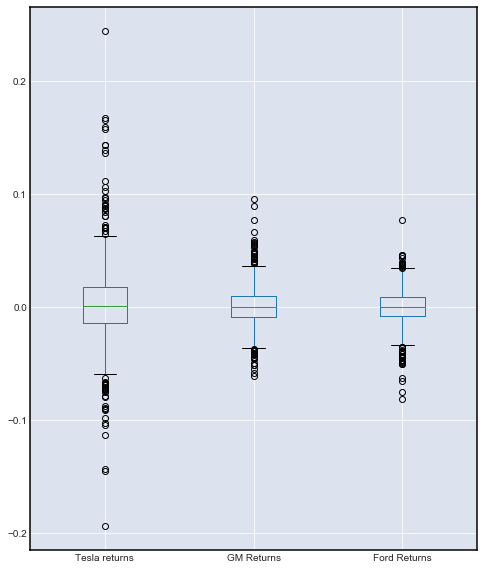

In [62]:
df_returns = pd.concat([tesla['returns'], gm['returns'], ford['returns']], axis=1)
df_returns.columns = ['Tesla returns', 'GM Returns', 'Ford Returns']
df_returns.plot(kind='box', figsize=(8,10))

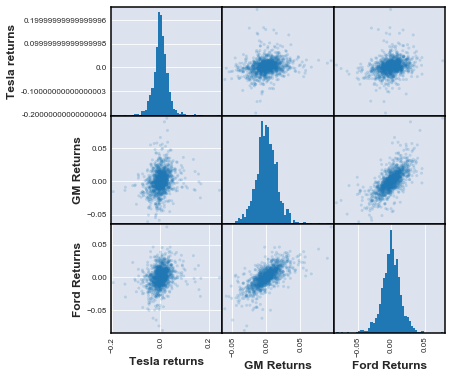

In [65]:
scatter_matrix(df_returns, alpha=0.2, figsize=(6,6), diagonal='hist', hist_kwds={'bins':50});

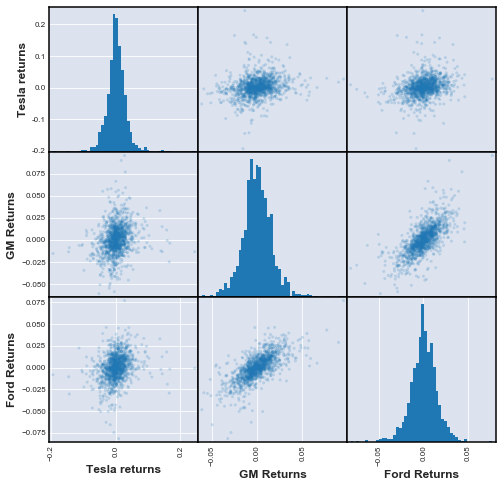

In [69]:
from matplotlib.ticker import FormatStrFormatter

axes = scatter_matrix(df_returns, alpha=0.2, figsize=(8,8), diagonal='hist', hist_kwds={'bins':50});

new_labels = [round(float(i.get_text()), 2) for i in axes[0,0].get_yticklabels()]
axes[0,0].set_yticklabels(new_labels);

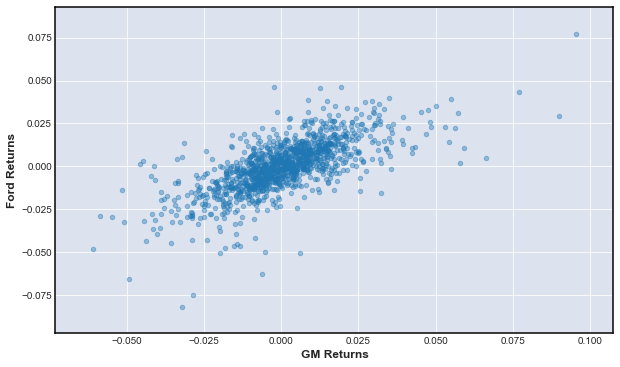

In [70]:
df_returns.plot.scatter(x='GM Returns', y='Ford Returns', figsize=(10,6), alpha=0.4);

### Insights: